In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-01.csv
/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-03.csv
/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-02.csv
/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv


# Load the Packages


In [29]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Data

In [30]:
# paths for the three dfs
df_jan_path="/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-01.csv"
df_feb_path="/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-02.csv"

df_mar_path="/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-03.csv"


# load the dataframes
df_jan = dd.read_csv(df_jan_path, assume_missing=True, usecols= ['trip_distance', 'tpep_pickup_datetime', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'], parse_dates=["tpep_pickup_datetime"])

df_feb = dd.read_csv(df_feb_path, assume_missing=True, usecols= ['trip_distance', 'tpep_pickup_datetime', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'], parse_dates=["tpep_pickup_datetime"])


df_mar = dd.read_csv(df_mar_path, assume_missing=True, usecols= ['trip_distance', 'tpep_pickup_datetime', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'], parse_dates=["tpep_pickup_datetime"])
print(df_jan.shape)

(<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(363f693)).size() // 7, dtype=int64>, 7)


In [31]:
df_final=dd.concat([df_jan,df_feb,df_mar],axis=0)

In [33]:
# set the values of coordinates

min_latitude = 40.60
max_latitude = 40.85

min_longitude = -74.05
max_longitude = -73.70


In [34]:
fare_amount=df_final["fare_amount"].compute()
trip_distance=df_final['trip_distance'].compute()

In [35]:
fare_amount.shape[0]/10000000

3.4499859

In [36]:
percentile_values=np.arange(0.991,1.000,0.001)
fare_amount.quantile(percentile_values)

0.991        52.00
0.992        52.00
0.993        52.00
0.994        52.00
0.995        54.00
0.996        58.50
0.997        63.00
0.998        69.00
0.999        81.00
1.000    429496.72
Name: fare_amount, dtype: float64

In [41]:
max_fare_amount=fare_amount.quantile(percentile_values).iloc[-2].item()
min_fare=0.50
max_fare_amount

81.0

In [42]:
trip_distance.quantile(percentile_values)

0.991          18.80
0.992          19.00
0.993          19.30
0.994          19.63
0.995          20.04
0.996          20.51
0.997          21.10
0.998          21.90
0.999          24.43
1.000    19072628.80
Name: trip_distance, dtype: float64

In [43]:
min_trip_distance=0.25

max_trip=trip_distance.quantile(percentile_values).iloc[-2].item()
max_trip

24.43

In [44]:
# set the values of coordinates

min_latitude = 40.60
max_latitude = 40.85

min_longitude = -74.05
max_longitude = -73.70

min_fare_amount_val = 0.50
max_fare_amount_val = 81.0

min_trip_distance_val = 0.25
max_trip_distance_val = 24.43

In [45]:
# select data points within the given ranges

df_final = df_final.loc[(df_final["pickup_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
(df_final["pickup_longitude"].between(min_longitude, max_longitude, inclusive="both")) & 
(df_final["dropoff_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
(df_final["dropoff_longitude"].between(min_longitude, max_longitude, inclusive="both")), :]

In [46]:
# select data points within the given ranges

df_final = df_final.loc[(df_final["fare_amount"].between(min_fare_amount_val,max_fare_amount_val,inclusive="both")) & 
(df_final["trip_distance"].between(min_trip_distance_val,max_trip_distance_val,inclusive="both"))]

In [47]:
# drop columns from the data

df_final = df_final.drop(columns=['trip_distance', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount'])

In [48]:
df_final

,tpep_pickup_datetime,pickup_longitude,pickup_latitude
npartitions=82,,,
,datetime64[ns],float64,float64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [81]:
pickup_cordinates=df_final.iloc[:,[2,1]].compute()

In [82]:
pickup_cordinates.to_csv('loc.csv')

KeyboardInterrupt: 

In [86]:
pickup_cordinates.shape

(33234199, 2)

In [64]:
sample_data_points=pickup_cordinates.sample(166500)

In [69]:
(166500/3234199)*100

5.148106223519331

In [65]:
sample_data_points.shape

(726500, 2)

Text(0, 0.5, 'Longitude')

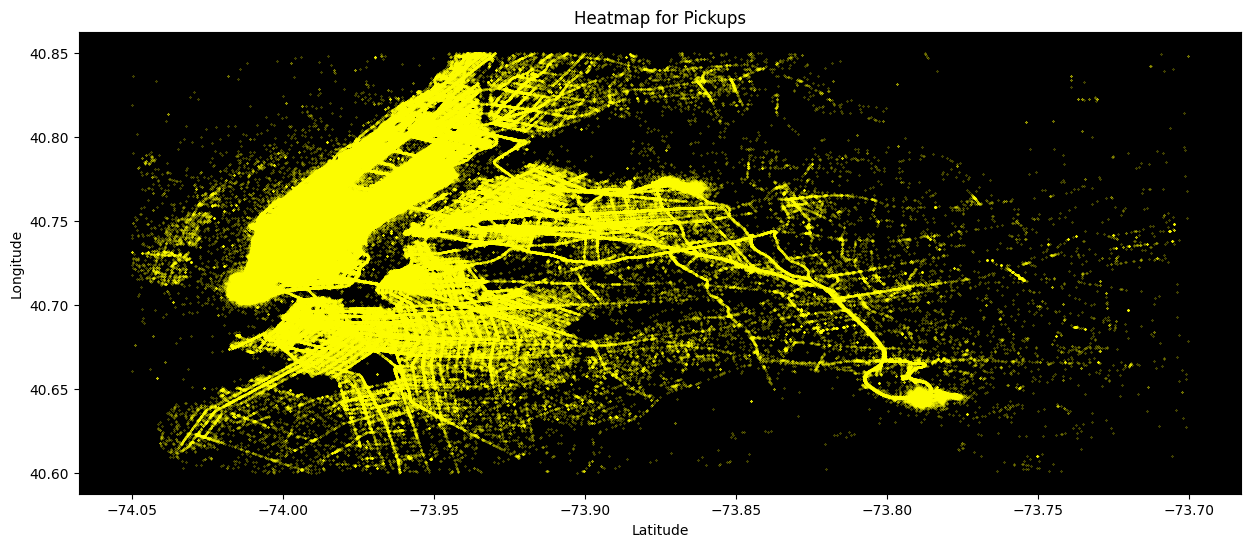

In [67]:
# plot the dataset on a scatterplot

fig,ax = plt.subplots(nrows=1,ncols=1,
                     figsize=(15,6))

ax.set_facecolor('k')
ax.scatter(pickup_cordinates['pickup_longitude'],pickup_cordinates['pickup_latitude'],s=0.05,color='yellow')
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

In [93]:
# scale the input columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_sample_df = scaler.fit_transform(pickup_cordinates)

In [72]:
from sklearn.cluster import MiniBatchKMeans


In [94]:
# get the scaler std and mean

print("The mean values are ", scaler.mean_)
print("The sigma values are ", scaler.scale_ )

The mean values are  [ 40.75107121 -73.9740618 ]
The sigma values are  [0.02722268 0.03675237]


In [95]:
def haversine_distance(lat1:float, lon1:float, lat2:float, lon2:float):
    """
    Calculate haversine distances between two points given their latitude and
    longitude coordinates
    """
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    
    earth_radius = 3958.8
    distance = earth_radius * c
    return distance

In [97]:
import numpy as np
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

def select_optimum_k(k_values, scaler, haversine_distance, data_path=None, pickup_coordinates=None, chunk_size=100000):
    """
    Trains MiniBatchKMeans for multiple k values, using either:
    - a CSV file (read in chunks), or
    - an existing DataFrame (split into chunks).
    """
    for k in k_values:
        mini_batch = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)

        # Decide data source: CSV or in-memory DataFrame
        if pickup_coordinates is not None:
            # Split DataFrame into chunks
            num_chunks = int(np.ceil(len(pickup_coordinates) / chunk_size))
            data_iterator = (pickup_coordinates.iloc[i*chunk_size:(i+1)*chunk_size] for i in range(num_chunks))
        elif data_path is not None:
            data_iterator = pd.read_csv(data_path, chunksize=chunk_size)
        else:
            raise ValueError("Either 'pickup_coordinates' DataFrame or 'data_path' must be provided.")

        # Train model incrementally
        for chunk in data_iterator:
            scaled_chunk = scaler.transform(chunk)
            mini_batch.partial_fit(scaled_chunk)

        # Get cluster centroids (inverse transform to original scale)
        centroids = scaler.inverse_transform(mini_batch.cluster_centers_)

        # Compute distances between all pairs of centroids
        all_distances = np.array([
            [haversine_distance(i[0], i[1], j[0], j[1]) for j in centroids]
            for i in centroids
        ])

        # Sort and compute region-based metrics
        sorted_distances = np.sort(all_distances, axis=-1)
        region_count = 8
        selected_distances = sorted_distances[:, 1:region_count + 1]
        avg_distances = selected_distances.mean(axis=1)

        # Count and report clusters fitting the distance criteria
        mask = (avg_distances >= 1.0) & (avg_distances <= 1.5)
        counter = mask.sum()
        percentage = mask.mean()

        print(f"For {k} clusters, {counter} regions ({percentage * 100:.1f}%) fit the criteria.")


In [87]:
pickup_cordinates.head()

,pickup_latitude,pickup_longitude
0,40.734695,-73.990372
1,40.729912,-73.980782
2,40.679565,-73.984550
3,40.718990,-73.993469
4,40.781330,-73.960625


In [99]:
possible_k_values = np.arange(10,100,10)



select_optimum_k(
    k_values=possible_k_values,
    scaler=scaler,
    haversine_distance=haversine_distance,
    pickup_coordinates=pickup_cordinates
)


For 10 clusters, 0 regions (0.0%) fit the criteria.
For 20 clusters, 5 regions (25.0%) fit the criteria.
For 30 clusters, 11 regions (36.7%) fit the criteria.
For 40 clusters, 7 regions (17.5%) fit the criteria.
For 50 clusters, 7 regions (14.0%) fit the criteria.
For 60 clusters, 10 regions (16.7%) fit the criteria.
For 70 clusters, 9 regions (12.9%) fit the criteria.
For 80 clusters, 15 regions (18.8%) fit the criteria.
For 90 clusters, 12 regions (13.3%) fit the criteria.


In [100]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans

# parameters
chunk_size = 100000
mini_batch = MiniBatchKMeans(n_clusters=30, n_init=10, random_state=42)

# loop over DataFrame in chunks
for start in range(0, len(pickup_cordinates), chunk_size):
    chunk = pickup_cordinates.iloc[start:start + chunk_size]
    scaled_chunk = scaler.transform(chunk)
    mini_batch.partial_fit(scaled_chunk)

# centroid values (in scaled space)
centroids_scaled = mini_batch.cluster_centers_

# convert back to original coordinate scale
centroids = scaler.inverse_transform(centroids_scaled)

centroids


array([[ 40.76117657, -73.99485366],
       [ 40.7204776 , -74.00108353],
       [ 40.6463863 , -73.78461644],
       [ 40.77061766, -73.9581889 ],
       [ 40.74827203, -73.97772847],
       [ 40.69617724, -73.92739475],
       [ 40.798151  , -73.96688641],
       [ 40.73840008, -73.87497335],
       [ 40.74264506, -74.00181407],
       [ 40.68656836, -73.98768865],
       [ 40.76165991, -73.96637997],
       [ 40.7353839 , -73.98637689],
       [ 40.75820135, -73.92168707],
       [ 40.79685822, -73.9437423 ],
       [ 40.71019154, -74.01082528],
       [ 40.73148628, -74.00226144],
       [ 40.83484984, -73.93550556],
       [ 40.71540998, -73.9550617 ],
       [ 40.74910172, -73.94147389],
       [ 40.77600931, -73.98213735],
       [ 40.78036817, -73.95350447],
       [ 40.81455029, -73.95211934],
       [ 40.75341012, -73.990573  ],
       [ 40.7719522 , -73.86918795],
       [ 40.72441011, -73.98860148],
       [ 40.76433493, -73.98326089],
       [ 40.78650682, -73.9748871 ],
 

In [101]:
# perform predictions and assign clusters

sample_predictions = mini_batch.predict(scaled_sample_df)

sample_predictions.shape

(33234199,)

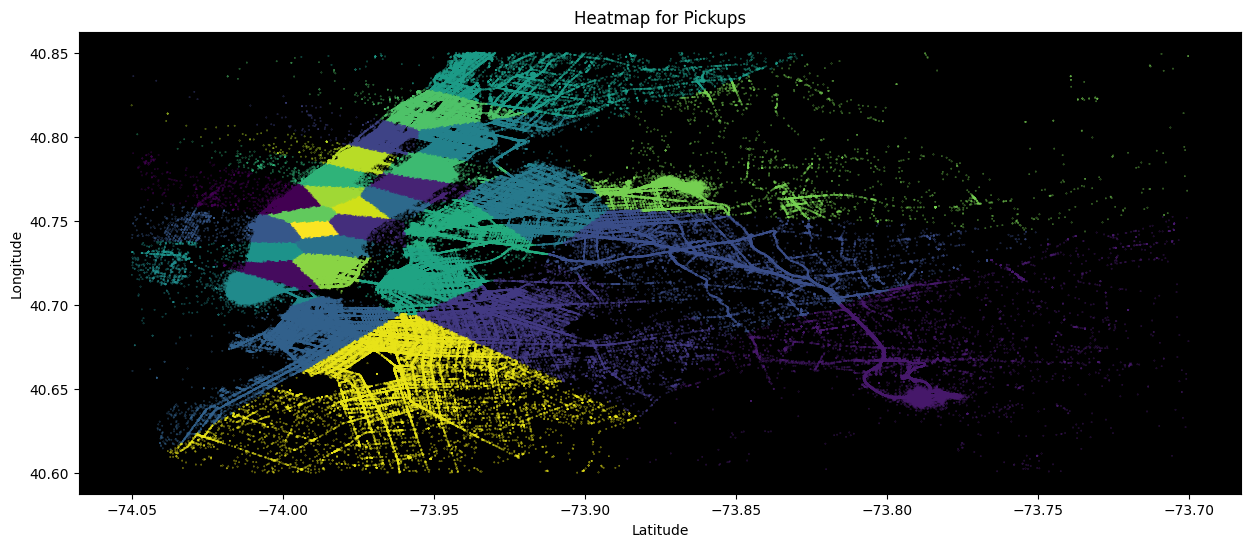

In [103]:
# plot the dataset on a scatterplot

fig,ax = plt.subplots(nrows=1,ncols=1,sharey=True,
                     figsize=(15,6))

ax.set_facecolor('k')
ax.scatter(pickup_cordinates['pickup_longitude'],pickup_cordinates['pickup_latitude'],
           s=0.05,c=sample_predictions)
ax.set_title('Heatmap for Pickups')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

In [107]:
sample_predictions

array([11, 11,  9, ...,  2, 19,  2], dtype=int32)

In [109]:
region_df=df_final.compute()

In [110]:
region_df.head()

,tpep_pickup_datetime,pickup_longitude,pickup_latitude
0,2016-01-01,-73.990372,40.734695
1,2016-01-01,-73.980782,40.729912
2,2016-01-01,-73.984550,40.679565
3,2016-01-01,-73.993469,40.718990
4,2016-01-01,-73.960625,40.781330


In [112]:
region_df['region'] = sample_predictions

In [115]:
region_df.head()

,tpep_pickup_datetime,pickup_longitude,pickup_latitude,region
0,2016-01-01,-73.990372,40.734695,11
1,2016-01-01,-73.980782,40.729912,11
2,2016-01-01,-73.984550,40.679565,9
3,2016-01-01,-73.993469,40.718990,1
4,2016-01-01,-73.960625,40.781330,20


In [131]:
# drop the latitude and logitude columns from data

time_series_data = region_df.drop(columns=["pickup_latitude","pickup_longitude"])

time_series_data

,tpep_pickup_datetime,region
0,2016-01-01 00:00:00,11
1,2016-01-01 00:00:00,11
2,2016-01-01 00:00:00,9
3,2016-01-01 00:00:00,1
4,2016-01-01 00:00:00,20
...,...,...
420269,2016-03-31 21:43:11,2
420270,2016-03-20 08:45:16,2
420271,2016-03-20 08:59:21,2
420273,2016-03-26 03:02:32,19


In [130]:


time_series_data.sample(1)

,region
tpep_pickup_datetime,
2016-01-17 15:45:00,25


In [128]:

# save_path = "../data/interim/time_series.csv"

# time_series_data.to_csv(index=False)

In [132]:
# set the time series as the index

time_series_data.set_index('tpep_pickup_datetime', inplace=True)

time_series_data

,region
tpep_pickup_datetime,
2016-01-01 00:00:00,11
2016-01-01 00:00:00,11
2016-01-01 00:00:00,9
2016-01-01 00:00:00,1
2016-01-01 00:00:00,20
...,...
2016-03-31 21:43:11,2
2016-03-20 08:45:16,2
2016-03-20 08:59:21,2


In [133]:
# group the time series data based on regions

region_grp = time_series_data.groupby("region")

region_grp

In [134]:
# check for missing values

time_series_data.isna().sum()

region    0
dtype: int64

In [135]:
# resample the time series in 15 minute intervals

resampled_data = (
    region_grp['region']
    .resample("15min")
    .count()
)

resampled_data

region  tpep_pickup_datetime
0       2016-01-01 00:00:00     138
        2016-01-01 00:15:00     229
        2016-01-01 00:30:00     213
        2016-01-01 00:45:00     231
        2016-01-01 01:00:00     217
                               ... 
29      2016-03-31 22:45:00     340
        2016-03-31 23:00:00     349
        2016-03-31 23:15:00     350
        2016-03-31 23:30:00     353
        2016-03-31 23:45:00     361
Name: region, Length: 262080, dtype: int64

In [138]:
resampled_data.name = "total_pickups"

In [139]:
resampled_data

region  tpep_pickup_datetime
0       2016-01-01 00:00:00     138
        2016-01-01 00:15:00     229
        2016-01-01 00:30:00     213
        2016-01-01 00:45:00     231
        2016-01-01 01:00:00     217
                               ... 
29      2016-03-31 22:45:00     340
        2016-03-31 23:00:00     349
        2016-03-31 23:15:00     350
        2016-03-31 23:30:00     353
        2016-03-31 23:45:00     361
Name: total_pickups, Length: 262080, dtype: int64

In [140]:
resampled_data = resampled_data.reset_index(level=0)

resampled_data

,region,total_pickups
tpep_pickup_datetime,,
2016-01-01 00:00:00,0,138
2016-01-01 00:15:00,0,229
2016-01-01 00:30:00,0,213
2016-01-01 00:45:00,0,231
2016-01-01 01:00:00,0,217
...,...,...
2016-03-31 22:45:00,29,340
2016-03-31 23:00:00,29,349
2016-03-31 23:15:00,29,350


In [141]:
# zeros in the data

(resampled_data['total_pickups'] == 0).sum()

4011

In [142]:
epsilon_val = 10

resampled_data.replace({'total_pickups': {0 : epsilon_val}}, inplace=True)

In [155]:
# zeros in the data

(resampled_data['total_pickups'] == 0).sum()

0

# Smoothing

## Moving Average

In [144]:
from sklearn.metrics import mean_absolute_percentage_error

In [145]:
window_values = list(range(3,11,1))
window_values

[3, 4, 5, 6, 7, 8, 9, 10]

In [146]:
def calculate_best_window_value(windows):
    for window in windows:
        ind = window - 1
        y_pred = resampled_data['total_pickups'].rolling(window=window).mean().values[ind:]
        y = resampled_data['total_pickups'].values[ind:]
        error = mean_absolute_percentage_error(y, y_pred)
        print(f"For window value {window}, the MAPE is {error:.2f}")

In [147]:
calculate_best_window_value(window_values)

For window value 3, the MAPE is 0.21
For window value 4, the MAPE is 0.25
For window value 5, the MAPE is 0.29
For window value 6, the MAPE is 0.33
For window value 7, the MAPE is 0.38
For window value 8, the MAPE is 0.42
For window value 9, the MAPE is 0.46
For window value 10, the MAPE is 0.50


In [148]:
resampled_data['total_pickups'].ewm(alpha=0.9).mean()

tpep_pickup_datetime
2016-01-01 00:00:00    138.000000
2016-01-01 00:15:00    220.727273
2016-01-01 00:30:00    213.765766
2016-01-01 00:45:00    229.278128
2016-01-01 01:00:00    218.227702
                          ...    
2016-03-31 22:45:00    338.875383
2016-03-31 23:00:00    347.987538
2016-03-31 23:15:00    349.798754
2016-03-31 23:30:00    352.679875
2016-03-31 23:45:00    360.167988
Name: total_pickups, Length: 262080, dtype: float64

In [149]:
smoothing_values = np.arange(0.2,1,0.1)
smoothing_values

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [151]:
def calculate_best_smoothing_value(values):
    y = resampled_data['total_pickups'].values
    for value in values:
        y_pred = resampled_data['total_pickups'].ewm(alpha=value).mean()
        error = mean_absolute_percentage_error(y, y_pred)
        print(f"For smoothing value {value:.1f}, the MAPE is {error:.2f}")

In [152]:
calculate_best_smoothing_value(smoothing_values)

For smoothing value 0.2, the MAPE is 0.44
For smoothing value 0.3, the MAPE is 0.30
For smoothing value 0.4, the MAPE is 0.22
For smoothing value 0.5, the MAPE is 0.17
For smoothing value 0.6, the MAPE is 0.13
For smoothing value 0.7, the MAPE is 0.09
For smoothing value 0.8, the MAPE is 0.06
For smoothing value 0.9, the MAPE is 0.03


In [160]:
# dataset with pickup smoothing applied

resampled_data["avg_pickups"] = resampled_data['total_pickups'].ewm(alpha=0.9).mean().round()

resampled_data

,region,total_pickups,avg_pickups
tpep_pickup_datetime,,,
2016-01-01 00:00:00,0,138,138.0
2016-01-01 00:15:00,0,229,221.0
2016-01-01 00:30:00,0,213,214.0
2016-01-01 00:45:00,0,231,229.0
2016-01-01 01:00:00,0,217,218.0
...,...,...,...
2016-03-31 22:45:00,29,340,339.0
2016-03-31 23:00:00,29,349,348.0
2016-03-31 23:15:00,29,350,350.0


In [161]:
resampled_data.size

786240

In [162]:
# save the resampled data

# resampled_data_save_path = "../data/interim/final_data.csv"

resampled_data.to_csv("final_data2.csv", index=True)

In [159]:
resampled_data.shape

(262080, 3)

# Training baseline model

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # load the data

# data_path = "/kaggle/working/final_data2.csv"

# df = pd.read_csv(data_path, parse_dates=["tpep_pickup_datetime"])

In [167]:
df=resampled_data.reset_index().copy()
df.shape

(262080, 4)

In [168]:
df.head()

,tpep_pickup_datetime,region,total_pickups,avg_pickups
0,2016-01-01 00:00:00,0,138,138.0
1,2016-01-01 00:15:00,0,229,221.0
2,2016-01-01 00:30:00,0,213,214.0
3,2016-01-01 00:45:00,0,231,229.0
4,2016-01-01 01:00:00,0,217,218.0


In [169]:
df.dtypes

tpep_pickup_datetime    datetime64[ns]
region                           int32
total_pickups                    int64
avg_pickups                    float64
dtype: object

In [172]:
df.isna().sum()

tpep_pickup_datetime    0
region                  0
total_pickups           0
avg_pickups             0
dtype: int64

In [173]:
# extract the day of week information
df["day_of_week"] = df["tpep_pickup_datetime"].dt.day_of_week

# extract the month information
df["month"] = df["tpep_pickup_datetime"].dt.month

In [174]:
# set the datetime column as index

df.set_index("tpep_pickup_datetime", inplace=True)

In [175]:
# create the region grouper

region_grp = df.groupby("region")

region_grp

In [176]:
# shifting periods

periods = list(range(1,5))

periods

[1, 2, 3, 4]

In [177]:
# generate the lag features

lag_features = region_grp["total_pickups"].shift(periods)

lag_features

,total_pickups_1,total_pickups_2,total_pickups_3,total_pickups_4
tpep_pickup_datetime,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN
2016-01-01 00:15:00,138.0,NaN,NaN,NaN
2016-01-01 00:30:00,229.0,138.0,NaN,NaN
2016-01-01 00:45:00,213.0,229.0,138.0,NaN
2016-01-01 01:00:00,231.0,213.0,229.0,138.0
...,...,...,...,...
2016-03-31 22:45:00,324.0,371.0,373.0,404.0
2016-03-31 23:00:00,340.0,324.0,371.0,373.0
2016-03-31 23:15:00,349.0,340.0,324.0,371.0


In [178]:
# merge them with the original df

data = pd.concat([lag_features,df],axis=1)

data

,total_pickups_1,total_pickups_2,total_pickups_3,total_pickups_4,region,total_pickups,avg_pickups,day_of_week,month
tpep_pickup_datetime,,,,,,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,0,138,138.0,4,1
2016-01-01 00:15:00,138.0,NaN,NaN,NaN,0,229,221.0,4,1
2016-01-01 00:30:00,229.0,138.0,NaN,NaN,0,213,214.0,4,1
2016-01-01 00:45:00,213.0,229.0,138.0,NaN,0,231,229.0,4,1
2016-01-01 01:00:00,231.0,213.0,229.0,138.0,0,217,218.0,4,1
...,...,...,...,...,...,...,...,...,...
2016-03-31 22:45:00,324.0,371.0,373.0,404.0,29,340,339.0,3,3
2016-03-31 23:00:00,340.0,324.0,371.0,373.0,29,349,348.0,3,3
2016-03-31 23:15:00,349.0,340.0,324.0,371.0,29,350,350.0,3,3


In [179]:
print("The shape of the df before merger ", df.shape)
print("The shape of the df after merger ", data.shape)

The shape of the df before merger  (262080, 5)
The shape of the df after merger  (262080, 9)


In [180]:
# rows having missing values

data.isna().any(axis=1).sum()

120

In [181]:
# drop the missing values

data.dropna(inplace=True)

In [183]:
data.isna().any(axis=1).sum()
mapper = {name:f"lag_{ind+1}" for ind, name in enumerate(data.columns[0:4])}

mapper

{'total_pickups_1': 'lag_1',
 'total_pickups_2': 'lag_2',
 'total_pickups_3': 'lag_3',
 'total_pickups_4': 'lag_4'}

In [184]:
# replace the column names

data = data.rename(columns=mapper)

In [185]:
# number of rows in each month

data['month'].value_counts()

month
3    89280
1    89160
2    83520
Name: count, dtype: int64

In [186]:
data.loc[data["month"].isin([1,2]),"lag_1":"day_of_week"]

,lag_1,lag_2,lag_3,lag_4,region,total_pickups,avg_pickups,day_of_week
tpep_pickup_datetime,,,,,,,,
2016-01-01 01:00:00,231.0,213.0,229.0,138.0,0,217,218.0,4
2016-01-01 01:15:00,217.0,231.0,213.0,229.0,0,214,214.0,4
2016-01-01 01:30:00,214.0,217.0,231.0,213.0,0,213,213.0,4
2016-01-01 01:45:00,213.0,214.0,217.0,231.0,0,187,190.0,4
2016-01-01 02:00:00,187.0,213.0,214.0,217.0,0,171,173.0,4
...,...,...,...,...,...,...,...,...
2016-02-29 22:45:00,228.0,260.0,340.0,459.0,29,237,237.0,0
2016-02-29 23:00:00,237.0,228.0,260.0,340.0,29,199,203.0,0
2016-02-29 23:15:00,199.0,237.0,228.0,260.0,29,159,163.0,0


In [187]:
# split the data

trainset = data.loc[data["month"].isin([1,2]),"lag_1":"day_of_week"]

testset = data.loc[data["month"].isin([3]),"lag_1":"day_of_week"]

In [189]:
# save the train and test data

train_data_save_path = "train.csv"

test_data_save_path = "test.csv"

trainset.to_csv(train_data_save_path, index=True)
testset.to_csv(test_data_save_path, index=True)

In [190]:
# make X_train and y_train

X_train = trainset.drop(columns=["total_pickups"])

y_train = trainset["total_pickups"]

In [195]:
# make X_test and y_test

X_test = testset.drop(columns=["total_pickups"])

y_test = testset["total_pickups"]

In [191]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error

In [193]:
# encode the data

encoder = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="first",sparse_output=False), ["region","day_of_week"])
], remainder="passthrough", n_jobs=-1)
encoder

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['region', 'day_of_week'])])

In [ ]:
# encode the train and test data


X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [197]:
# make predictions on the test data
# make predictions on the train data
# train the model

lr = LinearRegression()

# fit on the training data
lr.fit(X_train_encoded, y_train)
y_pred_train = lr.predict(X_train_encoded)
y_pred_test = lr.predict(X_test_encoded)

In [199]:
# evaluate the baseline model

train_mape = mean_absolute_percentage_error(y_train, y_pred_train)

test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f"MAPE on trainset is {(train_mape * 100):.2f}%")
print(f"MAPE on testset is {(test_mape * 100):.2f}%")

MAPE on trainset is 1.60%
MAPE on testset is 1.50%


# HyperParameter tuning

In [201]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [205]:
!pip install -q dagshub 'mlflow>=2,<3'


In [207]:
import mlflow
import dagshub

dagshub.init(repo_owner='AIwithAj', repo_name='Uber-Demand-prediction', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=d7279475-4960-4ded-af0b-7617e18f6b25&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=1b00088b7fead2a06923bd3361f9038ea2d982f8397db2439f6144fe5b583935




Accessing as AIwithAj

Initialized MLflow to track repo "AIwithAj/Uber-Demand-prediction"

Repository AIwithAj/Uber-Demand-prediction initialized!

In [208]:
import optuna
import tqdm 

In [210]:
def objective(trial):
    # start the child run
    with mlflow.start_run(nested=True) as child:
        
        # model name search space
        list_of_models = ["LR", "RF", "GBR", "XGBR"]
        model_name = trial.suggest_categorical("model_name", list_of_models)
    
        if model_name == "LR":
            model = LinearRegression()
    
        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,100,step=10)
            max_depth_rf = trial.suggest_int("max_depth_rf",3,8)
            model = RandomForestRegressor(n_estimators=n_estimators_rf, 
                                          max_depth=max_depth_rf, 
                                          random_state=42, n_jobs=-1)
    
        elif model_name == "GBR":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,100,step=10)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",1e-4,1e-1, log=True)
            model = GradientBoostingRegressor(n_estimators=n_estimators_gb, 
                                              learning_rate=learning_rate_gb,
                                             random_state=42)
    
        elif model_name == "XGBR":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,100,step=10)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",1e-4,1e-1, log=True)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",3,10)
            model = XGBRegressor(n_estimators=n_estimators_xgb,
                                learning_rate=learning_rate_xgb,
                                max_depth=max_depth_xgb)
    
        # log the model name
        mlflow.log_param("model_name",model_name)
        
        # log the model parameters
        mlflow.log_params(model.get_params())
        
        # fit on the data
        model.fit(X_train_encoded,y_train)
    
        # get the predictions
        y_pred = model.predict(X_test_encoded)
    
        # calculate the loss
        loss = mean_absolute_percentage_error(y_test, y_pred)
    
        # log the metric
        mlflow.log_metric("MAPE",loss)
        return loss

In [211]:
# optimize the objective function

with mlflow.start_run(run_name="best_model", nested=True) as parent:

    # create a study object
    study = optuna.create_study(study_name="model_selection", direction="minimize")
    # optimize the objective function
    study.optimize(func=objective, n_trials=50, n_jobs=-1)
    
    # log the best parameters
    mlflow.log_params(study.best_params)
    # log the best error value
    mlflow.log_metric("Best_MAPE", study.best_value)

[I 2025-10-06 20:28:43,287] A new study created in memory with name: model_selection


🏃 View run melodic-wasp-789 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/cd051144183d44ed937f078ba1fb24b6
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:28:53,310] Trial 1 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run melodic-wolf-851 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/105c9c513d134c478513dfbf9794c736
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:28:56,246] Trial 3 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run classy-shrimp-552 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/3f57fb593e4a45189b6045303a9f7f96
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:29:06,227] Trial 2 finished with value: 0.040010256978093406 and parameters: {'model_name': 'RF', 'n_estimators_rf': 40, 'max_depth_rf': 7}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run orderly-loon-605 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/7c9b93adf42e43e7aa6cdd937bf9cbea
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:29:14,254] Trial 5 finished with value: 5.937632385776551 and parameters: {'model_name': 'XGBR', 'n_estimators_xgb': 30, 'learning_rate_xgb': 0.007251862713936179, 'max_depth_xgb': 10}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run enchanting-worm-561 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/bd2350318b734a54843697f861d5991c
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:29:22,228] Trial 6 finished with value: 5.833178147392008 and parameters: {'model_name': 'XGBR', 'n_estimators_xgb': 40, 'learning_rate_xgb': 0.005887939363194573, 'max_depth_xgb': 6}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run gregarious-ox-485 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/d446e50257834fe7afad2c4996063938
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:29:30,234] Trial 8 finished with value: 7.3552497900855895 and parameters: {'model_name': 'XGBR', 'n_estimators_xgb': 10, 'learning_rate_xgb': 0.0003622710984360513, 'max_depth_xgb': 8}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:29:41,572] Trial 9 finished with value: 0.022423976545004515 and parameters: {'model_name': 'RF', 'n_estimators_rf': 10, 'max_depth_rf': 8}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run sincere-gnat-307 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/d142dcf44836474d9f2d71c6ebac2b09
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run nervous-gnu-746 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/6188a55150b94009974d7c5ad43316b1
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run honorable-lamb-563 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/11a432f8f6284b0597060de38f286f3a
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:29:50,241] Trial 0 finished with value: 5.189072617208281 and parameters: {'model_name': 'GBR', 'n_estimators_gb': 80, 'learning_rate_gb': 0.004648874753780624}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:29:51,230] Trial 7 finished with value: 0.5074983293683523 and parameters: {'model_name': 'RF', 'n_estimators_rf': 100, 'max_depth_rf': 3}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run crawling-slug-748 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/b888dbaa18cf4265953ac9f762d92a8d
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:30:06,244] Trial 10 finished with value: 7.307799363005641 and parameters: {'model_name': 'XGBR', 'n_estimators_xgb': 40, 'learning_rate_xgb': 0.00025275479219559916, 'max_depth_xgb': 8}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run tasteful-asp-489 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/21ad1301be584b16bb191ce549bba52d
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run bustling-doe-251 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/890032a18eff4e50a6f364e3eaa2b64e
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:30:16,238] Trial 4 finished with value: 5.057632339323703 and parameters: {'model_name': 'GBR', 'n_estimators_gb': 90, 'learning_rate_gb': 0.004435851767067059}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:30:17,239] Trial 11 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run popular-slug-769 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/c7d047cf2ecc467b86a6cd2ff9c897c2
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:30:23,318] Trial 12 finished with value: 0.0616224047897634 and parameters: {'model_name': 'RF', 'n_estimators_rf': 20, 'max_depth_rf': 6}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run bustling-hare-757 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/1493ff3642b54b798976a38951959ab3
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:30:38,291] Trial 13 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run whimsical-carp-129 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/4d46a284719040fcbbff7b5cdf3840dd
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run luminous-hog-786 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/ab76bc0476c14d0abd48f0739fae4eed
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:30:48,239] Trial 14 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:30:49,232] Trial 15 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run resilient-seal-243 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/a62617791ae34cf08f04045c132be37d
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:30:55,225] Trial 16 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run magnificent-foal-967 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/f1f0f4287ea943a587c85da286991487
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:31:10,225] Trial 17 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run bright-dove-889 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/8d4cf5184aec42a59c72cdefd0b07a1f
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run delicate-lark-73 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/60eb38408afa496391588d14e5101482
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:31:20,237] Trial 18 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:31:21,226] Trial 19 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run adaptable-horse-524 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/43101744b7f84ac28e897029e8915543
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:31:27,224] Trial 20 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run learned-pug-170 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/fdaf0118368e42c2bad4a44c40dac08f
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:31:38,309] Trial 21 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run respected-fawn-879 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/63a9385e26ad44108575b3885c1414bd
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run chill-penguin-894 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/395b84a34f744b59af5e973fb4ea5d96
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run gentle-ram-905 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/53048001cd1e457f83266888d3beee05
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:31:55,222] Trial 22 finished with value: 7.374635603535542 and parameters: {'model_name': 'GBR', 'n_estimators_gb': 10, 'learning_rate_gb': 0.00010291897325277417}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:31:56,226] Trial 24 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:31:57,237] Trial 23 finished with value: 7.371295813195055 and parameters: {'model_name': 'GBR', 'n_estimators_gb': 10, 'learning_rate_gb': 0.00015037336088799349}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run suave-kite-270 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/6d90771b42084bc8b6df38a517ccb169
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:32:10,234] Trial 25 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run worried-donkey-290 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/e631756fb8c14bf59e66e616495102a0
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run capable-lynx-166 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/70ed969bac4c4f1597d2a6305cf68329
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run delightful-conch-467 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/a79fa2cd98a448a2b2fd8716f3f50656
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:32:27,222] Trial 26 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:32:28,227] Trial 27 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:32:29,234] Trial 28 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run selective-loon-805 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/79071849494b4808bdc3751ce3bec2e4
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:32:42,242] Trial 29 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:33:14,690] Trial 31 finished with value: 0.23481937334651273 and parameters: {'model_name': 'GBR', 'n_estimators_gb': 50, 'learning_rate_gb': 0.0736092033921975}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run unique-grouse-205 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/f5951d7e8c904811b79ba728ab57d6ca
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run abundant-gull-319 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/37ac856caee442cb9f5965bd10f9aaa5
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:33:18,011] Trial 30 finished with value: 0.11524198134144104 and parameters: {'model_name': 'GBR', 'n_estimators_gb': 50, 'learning_rate_gb': 0.09016661409399578}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run agreeable-whale-371 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/28a2f8b471324ad4b8abf95ca9ea59d6
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:33:27,019] Trial 34 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run dapper-hare-63 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/124bdd61a19f47e9ab8bf388af2847ea
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run puzzled-moose-428 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/72527590b3a54fbc875054e8fe266ad0
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:33:36,011] Trial 32 finished with value: 0.36326267039365895 and parameters: {'model_name': 'GBR', 'n_estimators_gb': 50, 'learning_rate_gb': 0.06387168322663733}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:33:38,024] Trial 33 finished with value: 0.3354336150054691 and parameters: {'model_name': 'GBR', 'n_estimators_gb': 50, 'learning_rate_gb': 0.06579133537561806}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run clean-turtle-275 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/6aea0a8ff5b148639f2a54f3b939c4f7
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:33:49,020] Trial 35 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run stately-carp-960 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/e0f05a61d71a4d06bf6b4d8f2ebaa14a
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:33:59,020] Trial 36 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run angry-hawk-678 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/afe3b2ee324845d0b456adea94fe7aee
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run enthused-ray-488 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/797f4ab682ac42ed9877a2d955a17d0e
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:34:08,139] Trial 37 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:34:10,013] Trial 38 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run thoughtful-midge-899 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/2e55139ae12e41eda6dfa1b4ef70f774
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:34:19,016] Trial 39 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run blushing-kit-288 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/44c7c2ce06d8438a9f3ec4f695758229
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run enchanting-midge-480 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/937b4abe83b44a009890da0bad358b46
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run rare-grouse-517 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/a658cfa1ffe541b2b5460a69b2d76779
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:34:36,009] Trial 40 finished with value: 0.5075595381949213 and parameters: {'model_name': 'RF', 'n_estimators_rf': 90, 'max_depth_rf': 3}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:34:37,016] Trial 41 finished with value: 0.05036081327434249 and parameters: {'model_name': 'XGBR', 'n_estimators_xgb': 100, 'learning_rate_xgb': 0.08212222032273053, 'max_depth_xgb': 3}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:34:38,032] Trial 42 finished with value: 0.1728546294206107 and parameters: {'model_name': 'XGBR', 'n_estimators_xgb': 100, 'learning_rate_xgb': 0.04093306473998746, 'max_depth_xgb': 3}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run nervous-roo-114 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/92223b8b68954479aeb1576acd88ab51
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:34:55,014] Trial 43 finished with value: 0.5075595381949213 and parameters: {'model_name': 'RF', 'n_estimators_rf': 90, 'max_depth_rf': 3}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run marvelous-tern-42 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/4e917b4937874c969bea8a79c16b3e03
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run charming-ox-583 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/a362c4d8d25746c784b9bb45715d1dc3
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run dazzling-flea-790 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/24c3699e7a2742d49284696c66da3748
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:35:08,020] Trial 44 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:35:09,015] Trial 45 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:35:10,023] Trial 46 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run rogue-skunk-432 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/b5a9e442f8fe453ea0638c484dca3bd6
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:35:23,023] Trial 47 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run mysterious-hen-480 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/8bfa0042f1ba473b914654dd4c5af0a4
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0
🏃 View run burly-bird-776 at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/ff044246fa00455cb127a3f985fe5e7e
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


[I 2025-10-06 20:35:30,021] Trial 48 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.
[I 2025-10-06 20:35:31,010] Trial 49 finished with value: 0.015007191057052185 and parameters: {'model_name': 'LR'}. Best is trial 1 with value: 0.015007191057052185.


🏃 View run best_model at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0/runs/1af6900fd6be4b42b9f42ddadb83b8ab
🧪 View experiment at: https://dagshub.com/AIwithAj/Uber-Demand-prediction.mlflow/#/experiments/0


In [212]:
# best parameters
# best value

print(study.best_value,
study.best_params)

0.015007191057052185 {'model_name': 'LR'}


In [213]:
# model value counts

study.trials_dataframe()['params_model_name'].value_counts()

params_model_name
LR      30
GBR      8
RF       6
XGBR     6
Name: count, dtype: int64

In [214]:
# train the linear regression model

lr = LinearRegression()

lr.fit(X_train_encoded, y_train)

# get predictions
y_pred_train = lr.predict(X_train_encoded) 
y_pred_test = lr.predict(X_test_encoded)

# loss

mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("The training error is ", mape_train)
print("The test error is ", mape_test)

The training error is  0.01603164771673169
The test error is  0.015007191057052185
